In [1]:
# Importing all required libraries

import numpy as np
import pandas as pd
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import math as ma

# Supressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
data.sheet_names
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')

In [3]:
# Renaming column for easy analysis
df.rename(columns={'Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ': 'customer_id'}, inplace = True)

df.rename(columns={ 'Unnamed: 1':'fname',
                    'Unnamed: 2':'lname',
                    'Unnamed: 3':'gender',
                    'Unnamed: 4':'3y_bike_purchases',
                    'Unnamed: 5':'DOB',
                    'Unnamed: 6':'JT'}, inplace= True)

df.rename(columns={ 'Unnamed: 7':'Category',
                    'Unnamed: 8':'wealth_segement',
                    'Unnamed: 9':'D_Indicator',
                    'Unnamed: 10':'Default',
                    'Unnamed: 11':'owns_car',
                    'Unnamed: 12':'tenure'}, inplace= True)

df = df.iloc[1:]

df.head()

,customer_id,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,Default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [4]:
def check_NA():
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret

NaNlist = check_NA()
print(NaNlist, len(NaNlist))


[0, 0, 125, 0, 0, 87, 506, 656, 0, 0, 302, 0, 87] 13


Gender =  [2039, 1873, 88]
No. of bike = [98357, 93483, 3718]


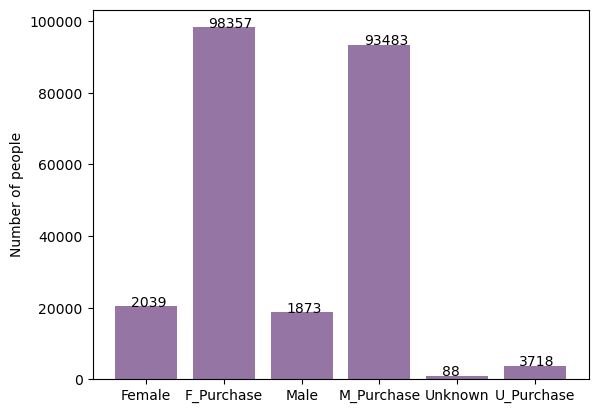

In [21]:
# Analyzing Gender vs bike bought

gender = [0,0,0]
for each in df['gender']:
    if each[0] == 'F':
        gender[0] +=1
    elif each[0] == 'M':
        gender[1] +=1
    else:
        gender[2] +=1
        
print('Gender = ',gender)

def gf(x, pos):
    return int(x)

bike = [0,0,0]
bike[0] = df['3y_bike_purchases'][df['gender'] == 'Female'].sum() + df['3y_bike_purchases'][df['gender'] == 'F'].sum()
bike[1] = df['3y_bike_purchases'][df['gender'] == 'Male'].sum() + df['3y_bike_purchases'][df['gender'] == 'M'].sum()
bike[2] = df['3y_bike_purchases'][df['gender'] == 'U'].sum()
print('No. of bike =',bike)

graph_0 = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graph_1 = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
col = (0.3,0.1,0.4,0.6)

formatter = FuncFormatter(gf)
x= np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)

plt.bar(x , graph_1, color =col )

for i in range(len(gender*2)):
    plt.text(x= i-0.2, y= graph_1[i]+0.1, s=graph_0[i], size=10)
    
plt.xticks(x,('Female', "F_Purchase", 'Male', "M_Purchase", 'Unknown', "U_Purchase"))
plt.show()

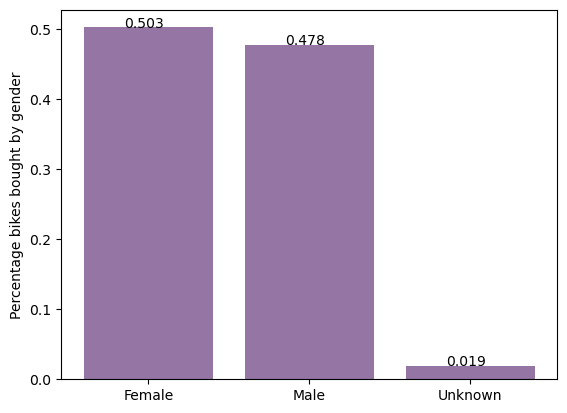

In [24]:
avg = [0,0,0]
ss = sum(bike)

for i in range(len(avg)):
    avg[i] += round(bike[i]/ss, 3)
    
x = np.arange(3)
fig, ax = plt.subplots()
ax.set_ylabel("Percentage bikes bought by gender")
plt.bar(x, avg, color = col)

for i in range(len(avg)):
    plt.text(x= i-0.15, y = avg[i], s = avg[i], size=10)
    
plt.xticks(x,('Female', 'Male', 'Unknown'))
plt.show()